In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM,Dense

In [3]:
data=pd.read_excel("/content/Crude Oil Prices Daily.xlsx") #loading the data

In [4]:
data.head(5)

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


# **`Data Preprocessing and Visualization **

In [5]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [6]:
data.dropna(axis=0, inplace = True)
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

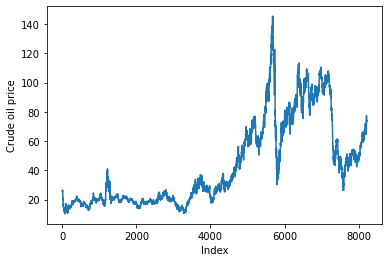

In [7]:
plt.plot(data.index,data['Closing Value']) #univariate analysis
plt.xlabel('Index')
plt.ylabel('Crude oil price')
plt.show()

In [8]:
train_set = data.iloc[:,1:2].values
train_set

array([[25.56],
       [26.  ],
       [26.53],
       ...,
       [73.05],
       [73.78],
       [73.93]])

In [9]:
len(train_set)

8216

In [10]:
scale = MinMaxScaler()
scaled_data = scale.fit_transform(train_set)
scaled_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

**Spliting dataset**

In [11]:
x_train = []
y_train = []

In [12]:
for i in range(230,8216):
  x_train.append(scaled_data[i-230:i,0])
  y_train.append(scaled_data[i,0])

In [13]:
x_train

[array([0.11335703, 0.11661484, 0.12053902, 0.11550422, 0.1156523 ,
        0.11683696, 0.1140234 , 0.10980305, 0.1089886 , 0.11054346,
        0.10165852, 0.09906708, 0.08203761, 0.07670665, 0.07404117,
        0.07167185, 0.06811787, 0.07863172, 0.06811787, 0.06930253,
        0.06908041, 0.06441582, 0.05308752, 0.03946394, 0.04464682,
        0.04701614, 0.05516067, 0.04834888, 0.04464682, 0.0406486 ,
        0.04575744, 0.04279579, 0.03294832, 0.03576188, 0.02872797,
        0.02502591, 0.03280024, 0.03280024, 0.03235599, 0.02813564,
        0.02206427, 0.01280912, 0.01280912, 0.01317933, 0.02132386,
        0.01473419, 0.01991707, 0.02206427, 0.02813564, 0.01739967,
        0.01702947, 0.02243447, 0.02798756, 0.02221235, 0.01851029,
        0.02739523, 0.01443803, 0.01614097, 0.01317933, 0.00814453,
        0.        , 0.00651562, 0.00814453, 0.01073597, 0.01851029,
        0.03065304, 0.01910262, 0.02036132, 0.02369317, 0.02502591,
        0.01991707, 0.01828817, 0.00925515, 0.01

In [14]:
y_train

[0.03731674811195024,
 0.03679845994372871,
 0.0361320894417296,
 0.03665037760995113,
 0.036206130608618395,
 0.03524359543906411,
 0.03465126610395379,
 0.0360580482748408,
 0.03879757144972605,
 0.0435362061306086,
 0.04538723530282836,
 0.04338812379683103,
 0.041314971123944916,
 0.04464682363394047,
 0.04664593513993781,
 0.049607581815489396,
 0.04945949948171181,
 0.051902857989041914,
 0.05479046349770471,
 0.05538279283281504,
 0.05686361617059084,
 0.05834443950836664,
 0.05723382200503481,
 0.05893676884347697,
 0.059455057011698495,
 0.06204649785280615,
 0.06315711535613801,
 0.06478602102769139,
 0.06374944469124834,
 0.06574855619724566,
 0.0654523915296905,
 0.06574855619724566,
 0.06256478602102768,
 0.06278690952169406,
 0.06182437435213979,
 0.06300903302236045,
 0.061750333185250986,
 0.06204649785280615,
 0.060935880349474295,
 0.061528209684584625,
 0.062416703687250094,
 0.06278690952169406,
 0.061750333185250986,
 0.06019546868058638,
 0.05930697467792094,
 0.0

In [15]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train.shape

(7986, 230)

In [17]:
x_train = np.reshape(x_train,(7986,230,1))

**Model Building**

In [18]:
model = Sequential()
model.add(LSTM(units=50,return_sequences= True,input_shape =(x_train.shape[1],1)))

In [19]:
model.add(LSTM(units = 50,return_sequences=True))
model.add(LSTM(units = 50,return_sequences=True))

In [20]:
model.add(Dense(units = 1))

In [21]:
model.compile(optimizer = "adam",loss = "mse",metrics = "mse")

In [22]:
model.fit(x_train,y_train,epochs=10,batch_size = 240)

Epoch 1/10
34/34 [==============================] - 54s 1s/step - loss: 0.0561 - mse: 0.0561
Epoch 2/10
34/34 [==============================] - 51s 1s/step - loss: 0.0489 - mse: 0.0489
Epoch 3/10
34/34 [==============================] - 48s 1s/step - loss: 0.0488 - mse: 0.0488
Epoch 4/10
34/34 [==============================] - 49s 1s/step - loss: 0.0487 - mse: 0.0487
Epoch 5/10
34/34 [==============================] - 50s 1s/step - loss: 0.0487 - mse: 0.0487
Epoch 6/10
34/34 [==============================] - 51s 1s/step - loss: 0.0485 - mse: 0.0485
Epoch 7/10
34/34 [==============================] - 49s 1s/step - loss: 0.0485 - mse: 0.0485
Epoch 8/10
34/34 [==============================] - 46s 1s/step - loss: 0.0484 - mse: 0.0484
Epoch 9/10
34/34 [==============================] - 48s 1s/step - loss: 0.0485 - mse: 0.0485
Epoch 10/10
34/34 [==============================] - 50s 1s/step - loss: 0.0485 - mse: 0.0485


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 230, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 230, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 230, 50)           20200     
                                                                 
 dense (Dense)               (None, 230, 1)            51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Testing and Saving the model**


In [29]:
pred = model.predict(x_train[0:300]) 

10/10 [==============================] - 1s 74ms/step


In [31]:
len(x_train)

7986

In [25]:
model.save("Prediction_Model.h5")

In [38]:
pred1 = model.predict(x_train) 

250/250 [==============================] - 21s 86ms/step


In [39]:
error = y_train - pred

In [40]:
r2=SE = error*error
MSE = SE.mean()
np.sqrt(MSE)

0.21978605642883384